*Creado por:*

*Isabel Maniega*

# Ejercicio 3: Regresión Múltiple

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


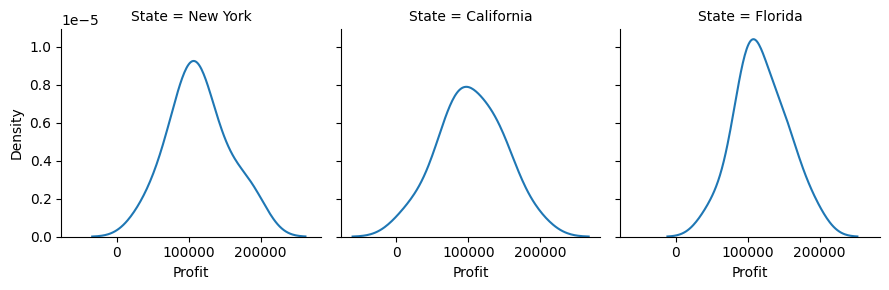

In [3]:
# spread of profit against state 
g=sns.FacetGrid(dataset, col='State')
g=g.map(sns.kdeplot,'Profit')

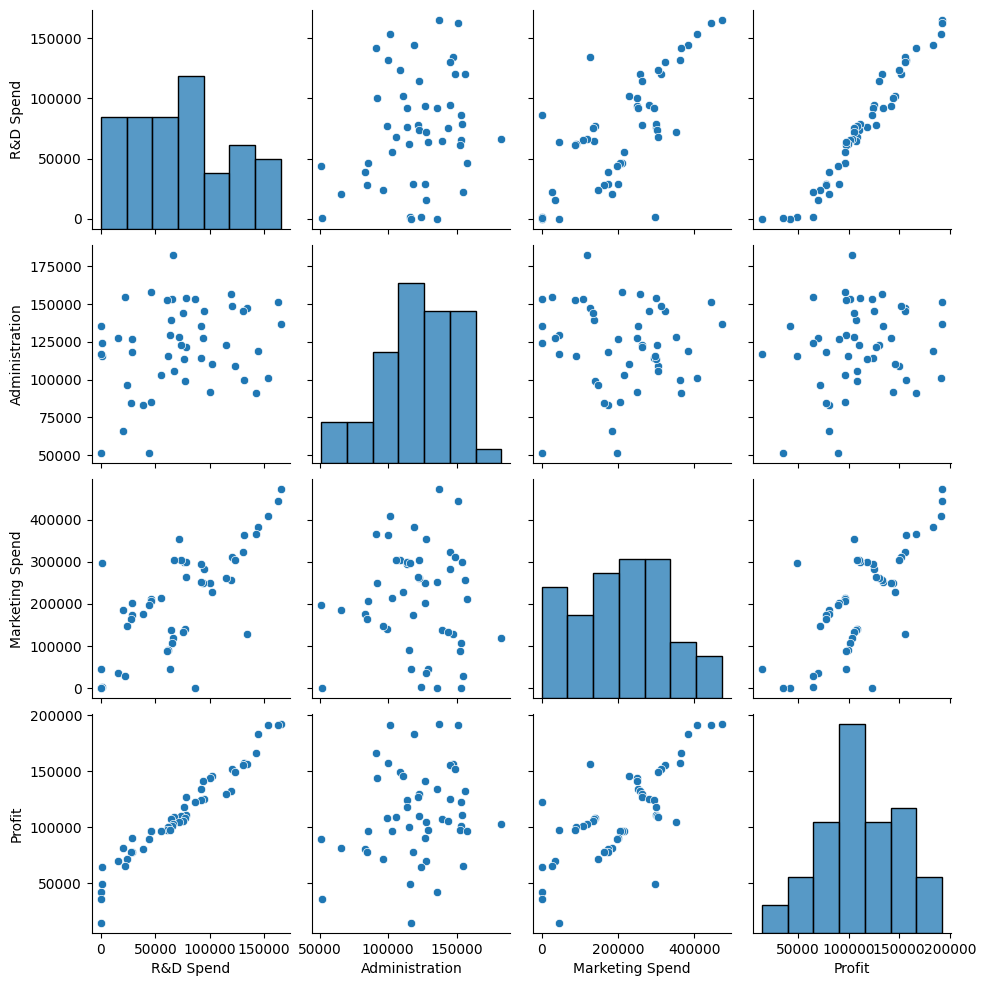

In [4]:
#Correlation  chart on different variables for comparision 
# Profit Vs R & Spend is very linear and almost same for Marketing spend
# Profit spend vs Administration distribution is very scattered 
sns.pairplot(dataset)

<Axes: xlabel='State', ylabel='Profit'>

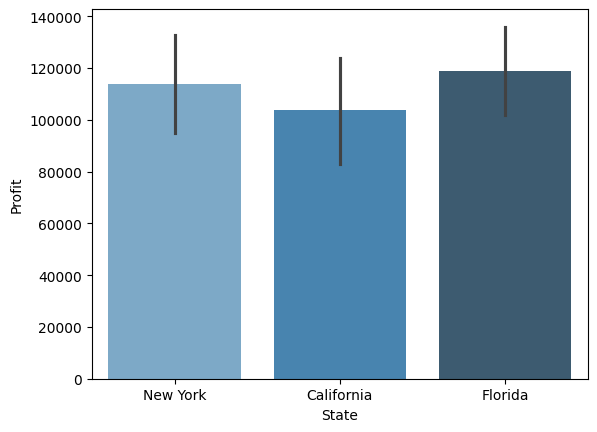

In [5]:
# profit split in State level - Looks Florida has the maximum Profit
sns.barplot(x='State',y='Profit',data=dataset,hue='State', palette="Blues_d")
#sns.lineplot(x='State',y='Profit',data=dataset)

In [6]:
# null values
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
y = dataset.pop('Profit')
X = dataset

In [8]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [9]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [10]:
# getting the dummies for state column
status=pd.get_dummies(dataset['State'],drop_first=True)
status.head()

,Florida,New York
0,False,True
1,False,False
2,True,False
3,False,True
4,True,False


<Axes: >

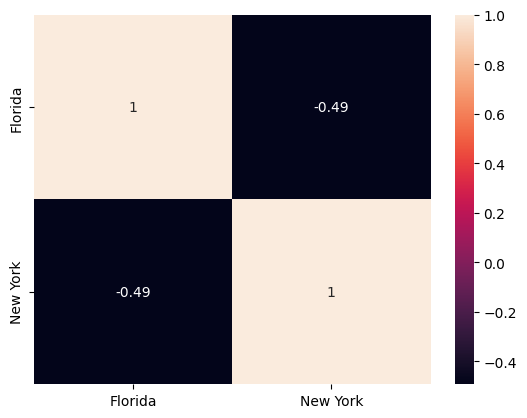

In [11]:
#gives positive & negative relation between categories
sns.heatmap(status.corr(), annot=True)

In [12]:
# concatinating the dataframes'
data=pd.concat([dataset, status],axis=1)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Florida,New York
0,165349.20,136897.80,471784.10,New York,False,True
1,162597.70,151377.59,443898.53,California,False,False
2,153441.51,101145.55,407934.54,Florida,True,False
3,144372.41,118671.85,383199.62,New York,False,True
4,142107.34,91391.77,366168.42,Florida,True,False


In [13]:
# dropping the state column
data.drop(['State'],axis=1,inplace=True)
data.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False


In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 0)

In [15]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [17]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [18]:
# predicting test results
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9347068473282423

In [19]:
testing_data_model_score = regressor.score(X_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = regressor.score(X_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9347068473282423
Model Score/Performance on Training data 0.9501847627493607


*Creado por:*

*Isabel Maniega*